In [2]:
import requests
import csv
import io
import pandas as pd 
import numpy as np
import vitaldb

# Define API base URL
BASE_URL = "https://api.vitaldb.net"

# Function to fetch and process CSV data
def fetch_csv(url):
    response = requests.get(url)
    if response.status_code == 200:
        content_type = response.headers.get("Content-Type", "")
        
        # Check if response is GZip compressed
        if "gzip" in content_type:
            print(f"Processing GZip-compressed data from {url}")
            csv_data = gzip.decompress(response.content).decode('utf-8')
        else:
            print(f"Processing regular CSV data from {url}")
            csv_data = response.content.decode('utf-8')
        
        return list(csv.reader(io.StringIO(csv_data)))
    else:
        print(f"Error {response.status_code}: Unable to fetch data from {url}")
        return None

# 1. Get clinical information
clinical_data = fetch_csv(f"{BASE_URL}/cases")
print("Clinical Data:", clinical_data[:5])  # Print first 5 rows

# 2. Get track list
track_list = fetch_csv(f"{BASE_URL}/trks")
print("Track List:", track_list[:5])  # Print first 5 rows

# 3. Get track data for a specific tid (replace with a valid tid)
if track_list:
    tid = track_list[1][2]  # Get the first track ID
    track_data = fetch_csv(f"{BASE_URL}/{tid}")
    print(tid)
    print(f"Track Data for {tid}:", track_data[:5])

# 4. Get laboratory results
lab_results = fetch_csv(f"{BASE_URL}/labs")
print("Lab Results:", lab_results[:5])  # Print first 5 rows


Processing regular CSV data from https://api.vitaldb.net/cases
Clinical Data: [['\ufeffcaseid', 'subjectid', 'casestart', 'caseend', 'anestart', 'aneend', 'opstart', 'opend', 'adm', 'dis', 'icu_days', 'death_inhosp', 'age', 'sex', 'height', 'weight', 'bmi', 'asa', 'emop', 'department', 'optype', 'dx', 'opname', 'approach', 'position', 'ane_type', 'preop_htn', 'preop_dm', 'preop_ecg', 'preop_pft', 'preop_hb', 'preop_plt', 'preop_pt', 'preop_aptt', 'preop_na', 'preop_k', 'preop_gluc', 'preop_alb', 'preop_ast', 'preop_alt', 'preop_bun', 'preop_cr', 'preop_ph', 'preop_hco3', 'preop_be', 'preop_pao2', 'preop_paco2', 'preop_sao2', 'cormack', 'airway', 'tubesize', 'dltubesize', 'lmasize', 'iv1', 'iv2', 'aline1', 'aline2', 'cline1', 'cline2', 'intraop_ebl', 'intraop_uo', 'intraop_rbc', 'intraop_ffp', 'intraop_crystalloid', 'intraop_colloid', 'intraop_ppf', 'intraop_mdz', 'intraop_ftn', 'intraop_rocu', 'intraop_vecu', 'intraop_eph', 'intraop_phe', 'intraop_epi', 'intraop_ca'], ['1', '5955', '0'

In [3]:
lab_results

[['caseid', 'dt', 'name', 'result'],
 ['1', '594470', 'alb', '2.9'],
 ['1', '399575', 'alb', '3.2'],
 ['1', '12614', 'alb', '3.4'],
 ['1', '137855', 'alb', '3.6'],
 ['1', '399575', 'alt', '12'],
 ['1', '137855', 'alt', '16'],
 ['1', '594470', 'alt', '17'],
 ['1', '12614', 'alt', '20'],
 ['1', '12611', 'aptt', '28'],
 ['1', '399575', 'ast', '16'],
 ['1', '12614', 'ast', '20'],
 ['1', '594470', 'ast', '21'],
 ['1', '137855', 'ast', '22'],
 ['1', '399575', 'bun', '10'],
 ['1', '137855', 'bun', '11'],
 ['1', '594470', 'bun', '11'],
 ['1', '12614', 'bun', '15'],
 ['1', '399575', 'cl', '96'],
 ['1', '137855', 'cl', '97'],
 ['1', '594470', 'cl', '99'],
 ['1', '-38769', 'cl', '100'],
 ['1', '-154782', 'cl', '100'],
 ['1', '-123020', 'cl', '100'],
 ['1', '75971', 'cl', '102'],
 ['1', '12614', 'cl', '105'],
 ['1', '594470', 'cr', '0.72'],
 ['1', '399575', 'cr', '0.75'],
 ['1', '12614', 'cr', '0.88'],
 ['1', '137855', 'cr', '0.91'],
 ['1', '594470', 'crp', '9.85'],
 ['1', '399575', 'crp', '11.97'

In [4]:
track_list

[['caseid', 'tname', 'tid'],
 ['1', 'BIS/BIS', 'fd869e25ba82a66cc95b38ed47110bf4f14bb368'],
 ['1', 'BIS/EEG1_WAV', '0aa685df768489a18a5e9f53af0d83bf60890c73'],
 ['1', 'BIS/EEG2_WAV', 'ad13b2c39b19193c8ae4a2de4f8315f18d61a57e'],
 ['1', 'BIS/EMG', '2525603efe18d982764dbca457affe7a45e766a9'],
 ['1', 'BIS/SEF', '1c91aec859304840dec75acf4a35da78be0e8ef0'],
 ['1', 'BIS/SQI', '087670cd3f03109ff5028f268587a9801865afca'],
 ['1', 'BIS/SR', '5154b6395a8636ea82d0e2648f2957227f0ad816'],
 ['1', 'BIS/TOTPOW', '11785e179322dd451895c9d97f8b3c40720416b4'],
 ['1', 'Primus/AWP', '37cdb593a215fe148d994485a93c77d8cc6a6008'],
 ['1', 'Primus/CO2', 'c39466fa9b7f231e1f26cdccb8ccf8fbde782459'],
 ['1', 'Primus/COMPLIANCE', '76d9573319e9771cee5174b7fc07ee8f983d3159'],
 ['1', 'Primus/ETCO2', '9b4169af3e550b1eaec8e3aa516b626b77340d82'],
 ['1', 'Primus/EXP_DES', 'e075523dc6d2c8339550c6446c0ce902bc539e66'],
 ['1', 'Primus/EXP_SEVO', 'c77bd561a06901712e306df618d4d33a3e256b88'],
 ['1', 'Primus/FEN2O', '2169070d1b75ef9b7

In [5]:
track_df = pd.DataFrame(track_list)
track_df.columns = track_df.iloc[0]
track_df = track_df[1:]
track_df = track_df.reset_index(drop=True)
heart_rates = track_df[track_df['tname'] =='Solar8000/HR']
heart_rates

,caseid,tname,tid
53,1,Solar8000/HR,6326f61f2b89f8afb550c102fd1b9c9e44249fe0
131,2,Solar8000/HR,6a4d5f0bfe719c853f927c4443d1e191235091d9
208,3,Solar8000/HR,32412e5c00538be1b90caa7afd9356ab3f958210
290,4,Solar8000/HR,e7b604a97b88f410b52e05f88182dd7861b645d8
380,5,Solar8000/HR,70bb5af22bd71a852ae47543ae12daad54090361
...,...,...,...
486126,6384,Solar8000/HR,19e25a739f102aa582b664fa6638534d1e1039c1
486202,6385,Solar8000/HR,b7b299e885c89876a5fd0d2dace0a1da96611adc
486277,6386,Solar8000/HR,7df4cf17c3d605f9df251722fc53158de3eb44f6
486353,6387,Solar8000/HR,0658a0b6a670fc1c75ed3966678e964a513bb5fb


In [6]:
vf = vitaldb.VitalFile(1)

vf.to_vital('1.vital')

True

In [20]:
heart_data = fetch_csv(f"{BASE_URL}/{'6326f61f2b89f8afb550c102fd1b9c9e44249fe0'}")
pd.DataFrame(heart_data[1:])[1].astype(int).mean()

Processing regular CSV data from https://api.vitaldb.net/6326f61f2b89f8afb550c102fd1b9c9e44249fe0


np.float64(77.19266727772685)

In [29]:
hr_means = []
for i in range(len(heart_rates)):
    heart_data = fetch_csv(f"{BASE_URL}/{heart_rates.iloc[i]['tid']}")
    hr_means.append(pd.DataFrame(heart_data[1:])[1].astype(int).mean())
hr_means

Processing regular CSV data from https://api.vitaldb.net/6326f61f2b89f8afb550c102fd1b9c9e44249fe0
Processing regular CSV data from https://api.vitaldb.net/6a4d5f0bfe719c853f927c4443d1e191235091d9
Processing regular CSV data from https://api.vitaldb.net/32412e5c00538be1b90caa7afd9356ab3f958210
Processing regular CSV data from https://api.vitaldb.net/e7b604a97b88f410b52e05f88182dd7861b645d8
Processing regular CSV data from https://api.vitaldb.net/70bb5af22bd71a852ae47543ae12daad54090361
Processing regular CSV data from https://api.vitaldb.net/b160fa44688dbf21d44db771a9de72a2d6d410bb
Processing regular CSV data from https://api.vitaldb.net/085164486217a84335c109c237bebe5c537e45d2
Processing regular CSV data from https://api.vitaldb.net/956f1631455e86830da11ef6c17c380ab8f9955e
Processing regular CSV data from https://api.vitaldb.net/6419c4502c8569dce4eaacb9a2272fa9367f6a27
Processing regular CSV data from https://api.vitaldb.net/f4009aa701558bc67625540581aa5d0daef147d6
Processing regular C

ReadTimeout: HTTPSConnectionPool(host='api.vitaldb.net', port=443): Read timed out. (read timeout=None)

In [38]:
import asyncio
import nest_asyncio
import aiohttp
import pandas as pd

async def fetch_csv_async(session, url):
    print(url)
    async with session.get(url) as response:
        if response.status == 200:
            data = await response.text()
            return pd.DataFrame([row.split(',') for row in data.splitlines()])[1:][1].astype(int).mean()
        return None  # Handle errors

async def get_hr_means():
    async with aiohttp.ClientSession() as session:
        tasks = [fetch_csv_async(session, f"{BASE_URL}/{tid}") for tid in heart_rates['tid']]
        print(tasks)
        return await asyncio.gather(*tasks)

# Run the event loop
nest_asyncio.apply()  # Allow nested event loops

# Now call your async function without asyncio.run()
hr_means = await get_hr_means()
print(hr_means)

[<coroutine object fetch_csv_async at 0x0000020047134340>, <coroutine object fetch_csv_async at 0x0000020047134440>, <coroutine object fetch_csv_async at 0x0000020047134540>, <coroutine object fetch_csv_async at 0x0000020047134640>, <coroutine object fetch_csv_async at 0x0000020047134740>, <coroutine object fetch_csv_async at 0x0000020047134840>, <coroutine object fetch_csv_async at 0x0000020047134940>, <coroutine object fetch_csv_async at 0x0000020047134A40>, <coroutine object fetch_csv_async at 0x0000020047134B40>, <coroutine object fetch_csv_async at 0x0000020047134C40>, <coroutine object fetch_csv_async at 0x0000020047134D40>, <coroutine object fetch_csv_async at 0x0000020047134E40>, <coroutine object fetch_csv_async at 0x0000020047134F40>, <coroutine object fetch_csv_async at 0x0000020047135040>, <coroutine object fetch_csv_async at 0x0000020047135140>, <coroutine object fetch_csv_async at 0x0000020047135240>, <coroutine object fetch_csv_async at 0x0000020047135340>, <coroutine ob

In [39]:
len(hr_means)

6387

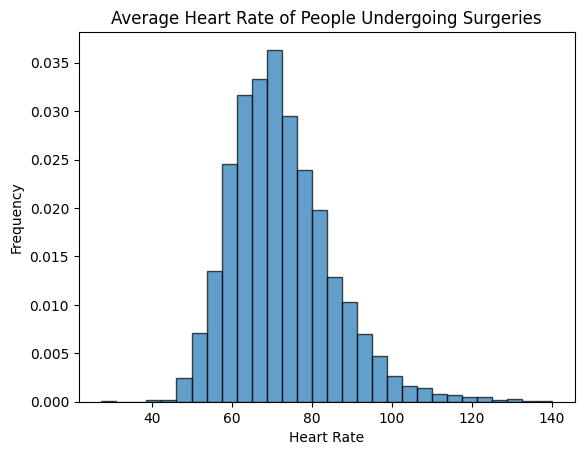

In [42]:
import matplotlib.pyplot as plt

# Plot the histogram
plt.hist(hr_means, density=True, bins=30, edgecolor='black', alpha=0.7)

# Labels and title
plt.xlabel("Heart Rate")
plt.ylabel("Frequency")
plt.title("Average Heart Rate of People Undergoing Surgeries")

# Show the plot
plt.show()